# <center>Projet économétrie des séries temporelles<center>

## Définition de l'environnement de travail

In [18]:
rm(list = ls())
setwd("C:/Users/PC/Documents/econometrics/")

## Installation des packages nécessaires aux projet

In [31]:
install.packages("tseries")
install.packages("readxl")
library("readxl")
library(tseries)
library(zoo)


  There is a binary version available but the source version is later:
         binary  source needs_compilation
tseries 0.10-48 0.10-53              TRUE

  Binaries will be installed


Warning message:
"package 'tseries' is in use and will not be installed"


  There is a binary version available but the source version is later:
       binary source needs_compilation
readxl  1.3.1  1.4.2              TRUE

  Binaries will be installed


Warning message:
"package 'readxl' is in use and will not be installed"

In [73]:
gov_reciept <- read_excel("reciept.xlsx")
summary(gov_reciept)
#View( gov_reciept) n'existe pas sur jupyter, mais peut être testé sur Rstudio

New names:
* `` -> ...1
* `Current receipts` -> `Current receipts...4`
* `From persons` -> `From persons...11`
* `From persons` -> `From persons...20`
* `Current expenditures` -> `Current expenditures...23`
* ... and 2 more problems


      ...1            Année       trimestre         Current receipts...4
 Min.   :  0.00   Min.   :1947   Length:304         Min.   :  52.3      
 1st Qu.: 75.75   1st Qu.:1966   Class :character   1st Qu.: 189.3      
 Median :151.50   Median :1984   Mode  :character   Median :1147.7      
 Mean   :151.50   Mean   :1984                      Mean   :1917.2      
 3rd Qu.:227.25   3rd Qu.:2003                      3rd Qu.:3189.6      
 Max.   :303.00   Max.   :2022                      Max.   :7618.1      
                                                    NA's   :1           
 Current tax receipts Personal current taxes Taxes on production and imports
 Min.   :  46.7       Min.   :  15.80        Min.   :  17.7                 
 1st Qu.: 153.7       1st Qu.:  60.73        1st Qu.:  61.7                 
 Median : 766.9       Median : 392.20        Median : 299.2                 
 Mean   :1319.1       Mean   : 695.89        Mean   : 491.3                 
 3rd Qu.:2195.1       3rd Qu.:1

In [74]:
dim(gov_reciept)

[1] 304  47

In [30]:
serie <- ts(data=gov_reciept[,2])
print(serie)

Time Series:
Start = 1 
End = 304 
Frequency = 1 
       Année
  [1,]  1947
  [2,]  1947
  [3,]  1947
  [4,]  1947
  [5,]  1948
  [6,]  1948
  [7,]  1948
  [8,]  1948
  [9,]  1949
 [10,]  1949
 [11,]  1949
 [12,]  1949
 [13,]  1950
 [14,]  1950
 [15,]  1950
 [16,]  1950
 [17,]  1951
 [18,]  1951
 [19,]  1951
 [20,]  1951
 [21,]  1952
 [22,]  1952
 [23,]  1952
 [24,]  1952
 [25,]  1953
 [26,]  1953
 [27,]  1953
 [28,]  1953
 [29,]  1954
 [30,]  1954
 [31,]  1954
 [32,]  1954
 [33,]  1955
 [34,]  1955
 [35,]  1955
 [36,]  1955
 [37,]  1956
 [38,]  1956
 [39,]  1956
 [40,]  1956
 [41,]  1957
 [42,]  1957
 [43,]  1957
 [44,]  1957
 [45,]  1958
 [46,]  1958
 [47,]  1958
 [48,]  1958
 [49,]  1959
 [50,]  1959
 [51,]  1959
 [52,]  1959
 [53,]  1960
 [54,]  1960
 [55,]  1960
 [56,]  1960
 [57,]  1961
 [58,]  1961
 [59,]  1961
 [60,]  1961
 [61,]  1962
 [62,]  1962
 [63,]  1962
 [64,]  1962
 [65,]  1963
 [66,]  1963
 [67,]  1963
 [68,]  1963
 [69,]  1964
 [70,]  1964
 [71,]  1964
 [72,]  1964
 

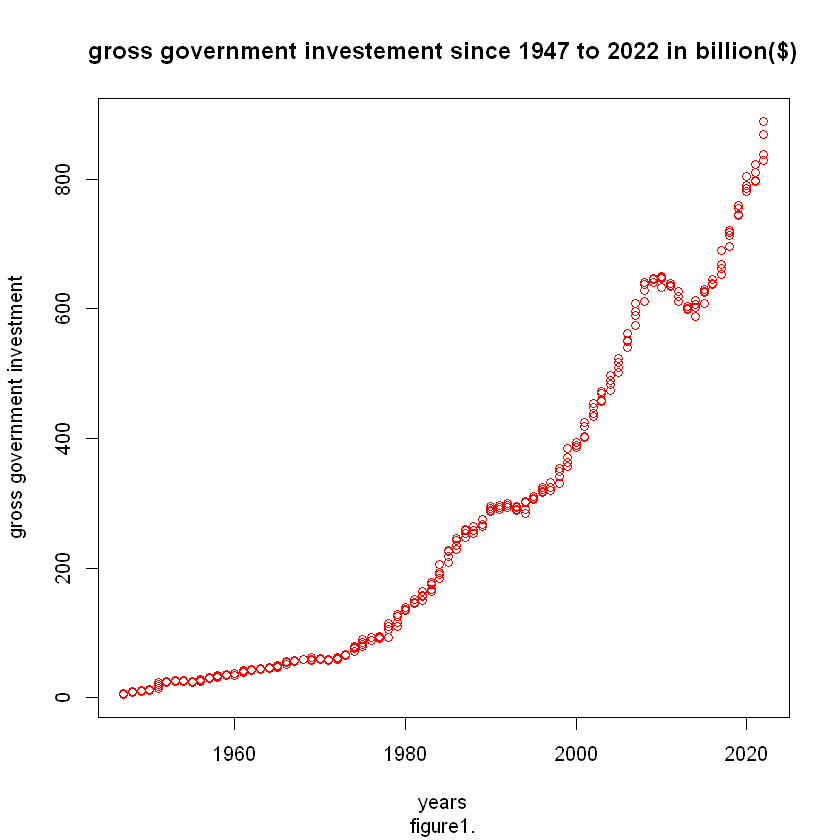

In [56]:
##graphique de base
gross_gov <- gov_reciept$`Gross government investment`
plot(serie, gross_gov, col="red", main="gross government investement since 1947 to 2022 in billion($)", ylab="gross government investment", xlab="years", sub="figure1.")

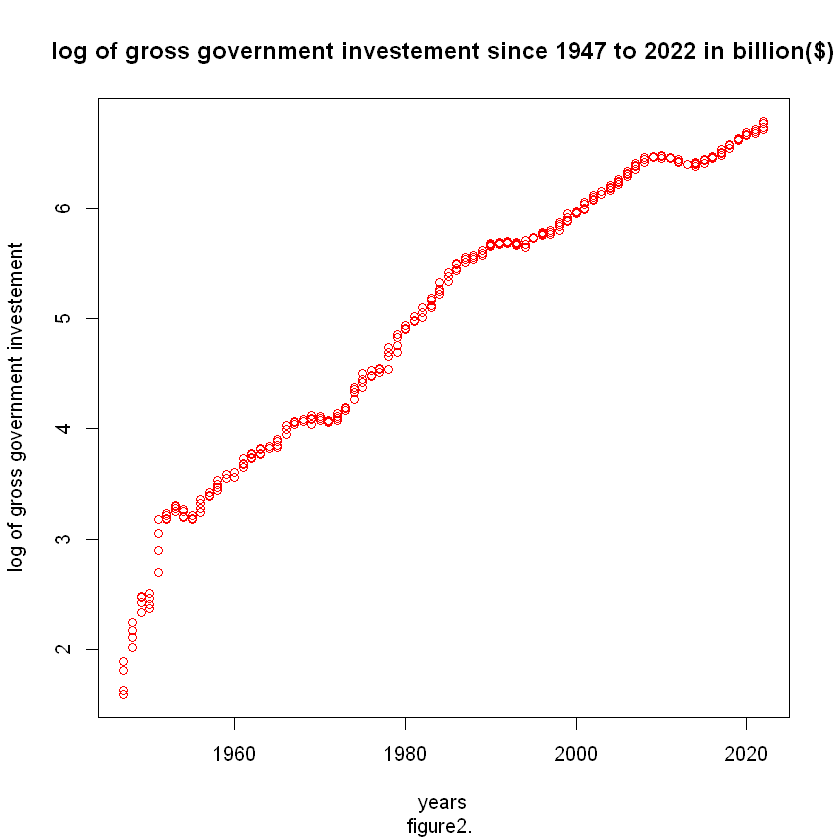

In [63]:
##graphique avec log
plot(serie, log(gross_gov), col="red", main="log of gross government investement since 1947 to 2022 in billion($)", sub="figure2. ", xlab="years", ylab="log of gross government investement")

#### On constate d'après la figure 2, qu'avec le log, la série se lisse légèrement. On prendra alors, la différence première

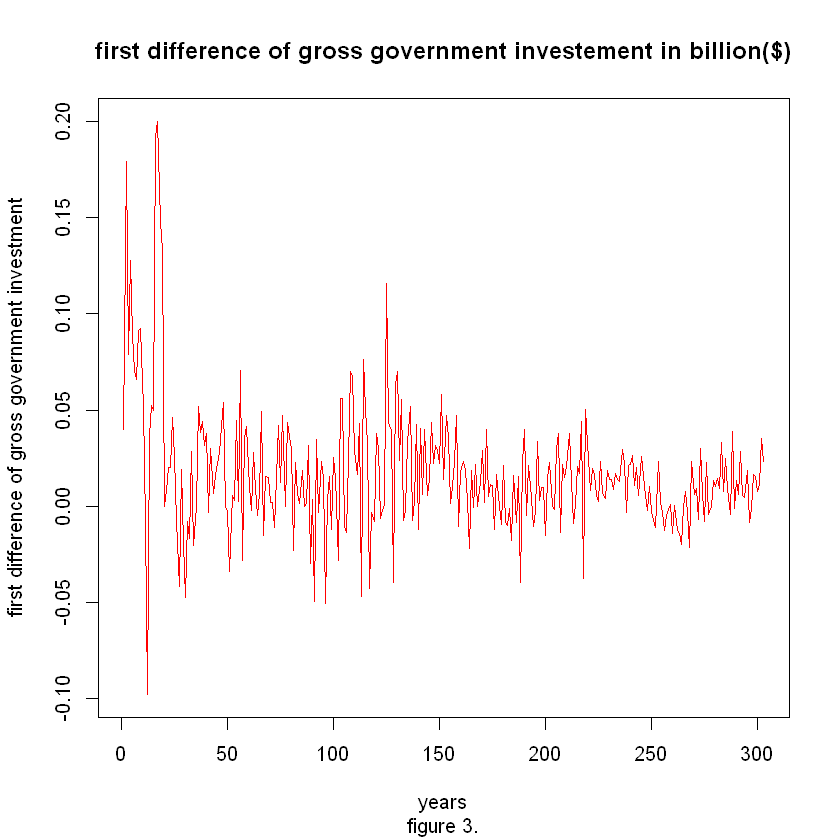

In [65]:
diff_premiere = diff(log(gross_gov), differences=1)

plot(diff_premiere, type="l", col="red", main="first difference of gross government investement in billion($)", sub="figure 3.",xlab="years", ylab="first difference of gross government investment")

## Test de Dickey-füler pour vérifier si la série est stationnaire

In [46]:
##test fuuler

adf.test(diff_premiere, alternative="stationary") #test de statinnarité rejeté car p-value=0.01< 5%, donc l'hypothèse de stationnarité

Warning message in adf.test(diff_premiere, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff_premiere
Dickey-Fuller = -5.9545, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


## test de Philipps-Perron(PP) pour vérifier la stationnarité

In [47]:
##test de PP
PP.test(diff_premiere, lshort = TRUE)


	Phillips-Perron Unit Root Test

data:  diff_premiere
Dickey-Fuller = -12.333, Truncation lag parameter = 5, p-value = 0.01


### Autocorrélogramme de la différence première

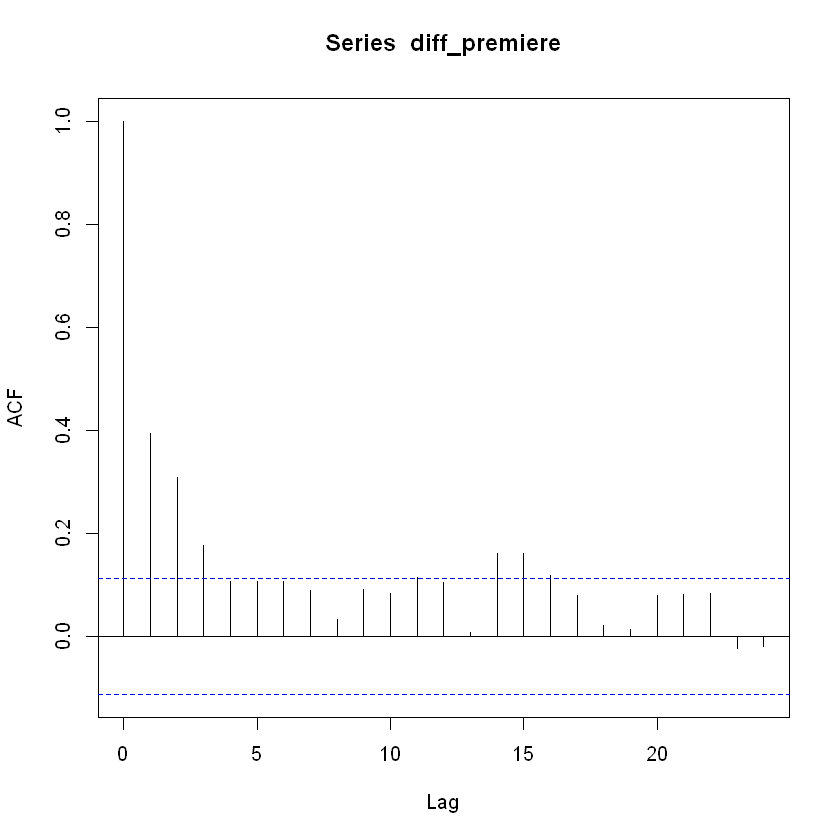

In [48]:
acf(diff_premiere)

## Autocorrélogramme partiel de la différence première

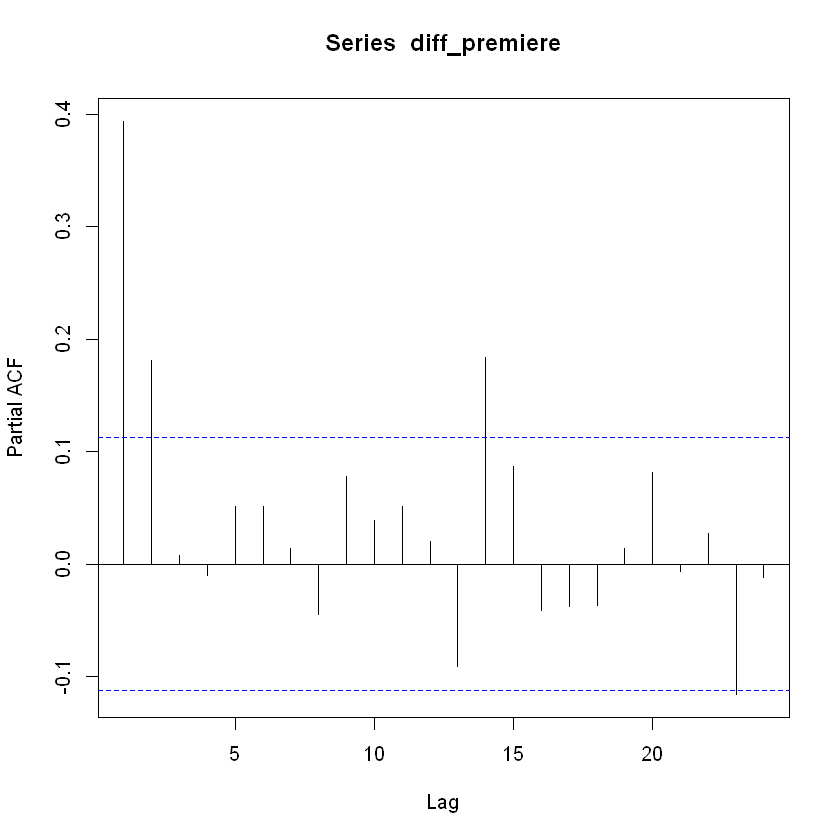

In [70]:
pacf(diff_premiere)

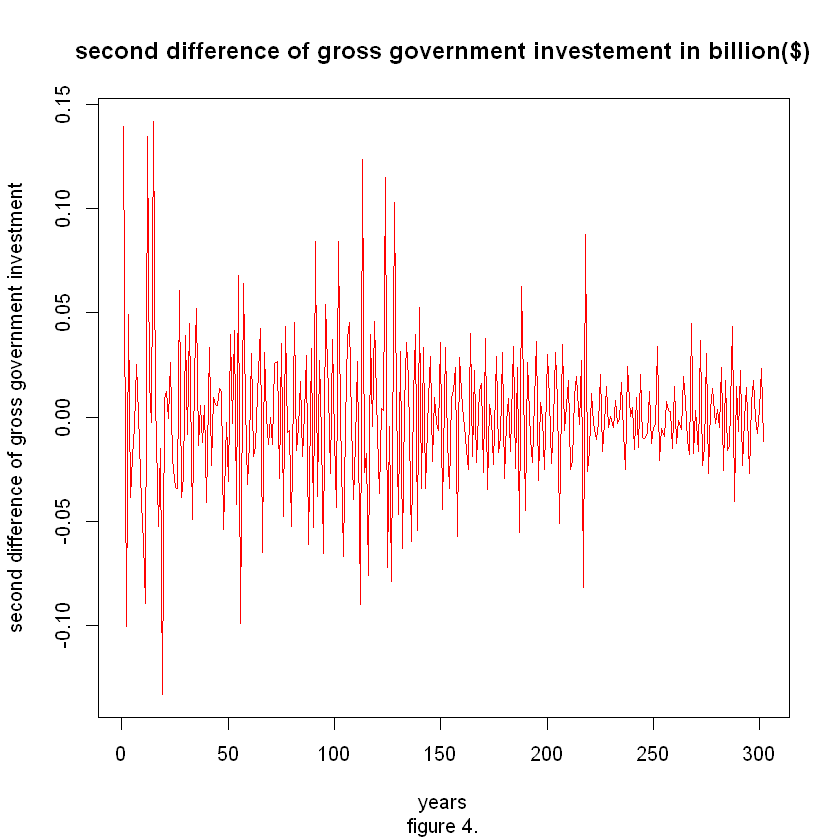

In [71]:
diff_seconde = diff(log(gross_gov), differences=2)

plot(diff_seconde, type="l", col="red", main="second difference of gross government investement in billion($)", sub="figure 4.",xlab="years", ylab="second difference of gross government investment")